---
title: Linear algebra
jupyter: python3
---


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Fira+Mono&family=Fira+Sans&display=swap" rel="stylesheet">

In this chapter we will learn how to use Python for linear algebra. 

## Packages

In the first session of this crash course you have learned the basics of Python: how to use Python as a calculator, use lists, for-loops, and if-else-statements. 

Python can be used for much more advanced operations as well. As you can imagine, code quickly grows more complicated. Fortunately, we can reuse code written by other through so-called **packages** (or libraries). In the optional chapter @sec-math-basics you might have seen several packages already. 

Using packages has several advantages. If you use a standard package, then it makes your code more readable. It also reduces the risk of errors: Python packages are typically developed by expert programmers and thoroughly tested before they are released to the public. For the mainstream packages that we will be using, you can thus be reasonably confident that they deliver what they promise. 

Another major advantage of packages is that they are often heavily optimized in terms of speed and memory efficiency.^[Under the hood, numpy for instance relies on BLAS and LAPACK for most of its linear algebraic subroutines. BLAS and LAPACK are written in a programming language called Fortran, see for example the <a href ="https://www.netlib.org/lapack/#_presentation">LAPACK documentation</a>. LAPACK is used by many other programming languages, including Matlab.] 



Today we will use several well-known packages:

- <a href="https://numpy.org/">NumPy</a>, 
- Sympy, 
- and <a href="https://matplotlib.org/">Matplotlib</a>. 


In a nutshell: packages are functions written by other people to make our life easy, i.e., so that we do not have to write every code file from scratch in Python.

*The NumPy, SymPy and Matplotlib packages should be installed in a standard Anaconda installation. If you have another Python installation, typically using the PIP package manager should allow you to install packages. In this case, commands like `pip install numpy` and `pip install sympy` should do the job.*



## Why `numpy` and `sympy`?

The package `numpy` is designed for fast numerical calculations, e.g., with matrices. We can compute matrix products, solve linear systems, and compute inverses with `numpy` very quicky.
The package `sympy`, on the other hand, is a symbolic mathematics library. It can do exact algebraic manipulations (also with variables x and y), but it is less quick than numerical computations with `numpy`. `sympy` also contains a method to do exact row-reduction, to bring a matrix into reduced echelon form. This may also be useful if you did row-reduction by hand and want to verify your result with the computer. 

## Basic matrix and vector operations with Numpy

Suppose we have the following vectors $\mathbf{x}$ and $\mathbf{y}$, and matrix $A$: 
$$
\mathbf{x}=\left[\begin{array}{c}1\\2\\3 \end{array} \right], \mathbf{y}=\left[\begin{array}{c}4\\5\\7 \end{array} \right],  A =  \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}
$$

We can define vectors in Python as so-called NumPy arrays. Think of these as lists (that we saw earlier) on which we can perform numerical computations. To create such arrays, we have to import the NumPy package `numpy`. We do this under the *alias* `np` (so that we can use the short-hand notation `np` for `numpy` everywhere).


In [ ]:
import numpy as np

# Define the vectors and matrix
x = np.array([1, 2, 3])
y = np.array([4, 5, 7])
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

In Python, we can add vectors, compute the matrix-vector product and multiply matrices.
Note: To compute a matrix-vector product you use the command `A@x`. What happens if you use the command `A*x`?
Now, try to compute $A\mathbf{x}$, $A\mathbf{y}$, and $A(\mathbf{x}+\mathbf{y})$ with Python. What do you notice?

In [ ]:
# your code here

## Application: input-output models 

(From Python Linear Algebra Notebook by Herbert Hamers)

A chemical plant receives oil from three different regions: the Middle East, South America, and the NorthSea. The quality of the oil is different for each region. These oils will be used to produce gasoline, diesel fuel, and bike chain oil. The oil from the Middle east will be only used for the production of gasoline. Of the oil of South America, $20$ % will be used for the production of gasoline, and $80$ % for the production of diesel fuel. Finally, $25$ % of the North Sea oil will be used to produce gasoline, $25$ % to produce diesel fuel, and 50 % for the production of bike chain oil.

Suppose today a shipment arrives of $5000$ barrels of oil from the Middle East, $9000$ barrels of oil from South America, and $1000$ barrels from the North Sea. The plant wants to know how much gasoline, diesel fuel, and bike chain oil it can produce from this shipment.

Obviously, the $5000$ barrels of oil from the Middle East will completely be used for the production of gasoline, i.e. $1\cdot 5000 = 5000$ barrels of gasoline. Of the $9000$ barrels of South America oil, $20$ % will be used for the production of gasoline. Hence, this leads to $0.2 \cdot 9000 = 1800$ barrels of gasoline. Finally, of the $1000$ barrels of North sea oil 25 % will be used for the production of gasoline. Hence, we obtain $0.25\cdot 1000 = 250$ barrels of gasoline. Hence, the total number of barrels of gasoline that will be produced is
$$
1 \cdot 5000 + 0.2 \cdot 9000 + 0.25 \cdot 1000 = 5000+1800+250=7050.
$$
By a similar computation, one can compute the total number of barrels of diesel fuel:
$$
0 \cdot 5000 + 0.8 \cdot 9000 + 0.25 \cdot 1000 = 7450.
$$
Finally, one can show that the total number of barrels of bike chain oil is $500$, using a similar computation. 

The production process can be summarized using the matrix-vector product. The production process is represented by the following matrix
$$
\begin{bmatrix} 1 & 0.2 & 0.25 \\ 0 & 0.8 & 0.25 \\ 0 &0 &0.5 \end{bmatrix},
$$
where the first column represents the division in the three end products of the Middle East oil, the second column represents the division in the three end products of the South America oil, and the third column represents the division in the three end products of the North Sea oil.

In [ ]:
A=np.array([[1,0.2,0.25],[0,0.8,0.25],[0,0,0.5]])
print(A)

The shipment of the oil can be summarized by the following vector:
$$
q = \begin{bmatrix} 5000 \\ 9000 \\ 1000 \end{bmatrix}
$$

Using the matrix-vector product, it can easily be calculated how much gasoline, diesel fuel, and bike chain oil can be produced from this oil-delivery:
$$
Aq = \begin{bmatrix} 1 & 0.2 & 0.25 \\ 0 & 0.8 & 0.25 \\ 0 &0 &0.5 \end{bmatrix} \begin{bmatrix} 5000 \\ 9000 \\ 1000 \end{bmatrix} = \begin{bmatrix} 1 \cdot 5000 + 0.2 \cdot 9000 + 0.25 \cdot 1000 \\ 0 \cdot 5000 + 0.8 \cdot 9000 + 0.25 \cdot 1000\\ 0 \cdot 5000 + 0 \cdot 9000 + 0.5 \cdot 1000  \end{bmatrix}  = \begin{bmatrix} 7050 \\ 7450 \\ 500 \end{bmatrix} 
$$

Hence, using the matrix-vector product we come to the same conclusion: the oil-delivery will result in 7050 barrels of gasoline, 7450 barrels of diesel fuel, and 500 barrels of bike chain oil.

The next day a shipment of 10000 barrels of oil from the Middle East, 1000 barrels of South America, and 200 barrels of the North Sea arrives. Determine the output of gasoline, diesel fuel, and key chain oil of this oil-delivery.

In [ ]:
# your code here

Let us continue with a variation on the above problem.

Now, a chemical plant receives oil from five different regions: the Middle East, South America, the North Sea,Africa and Asia. Again, the quality of the oil is different for each region. These oils will be used to produce gasoline, diesel fuel, bike chain oil, fuel $95$ and fuel $98$. The oil from the Middle east will be only used for the production of gasoline. Of the oil of South America, $20$% will be used for the production of gasoline, and $80$% for the production of diesel fuel. $25$% of the North Sea oil will be used to produce gasoline, $25$% to produce diesel fuel, and $50$% for the production of bike chain oil. Of the oil of Africa, $10$% will be used for the production of gasoline, $10$% for the production of bike chain oil, $30$% for the production of fuel $95$ and $50$% for the production of fuel $98$. Finally, $30$% of the Asia oil will be used to produce gasoline, $5$ % to produce diesel fuel, $50$ % for the production of fuel $95$, and $15$% for the production of fuel $98$.

Suppose today a shipment arrives of $5000$ barrels of oil from the Middle East, $9000$ barrels of oil from South America, $1000$ barrels from the North Sea, $4000$ barrels of oil from Africa, and 4000 barrels of oil from Asia. The plant wants to know how much gasoline, diesel fuel, bike chain oil, fuel $95$, and fuel $98$ it can produce from this shipment.

With the new information $A$ will be a 5x5 matrix and $q$ will be a 5x1 vector. Determine the output of gasoline, diesel fuel, bike chain oil, fuel $95$, and fuel $98$ of this oil-delivery.

In [ ]:
# your code here

## Matrix operations: inverse, determinant, solving linear systems


Assuming we imported NumPy under the alias `np`, the module `np.linalg` from NumPy contains several standard linear algebra methods that we will encounter today.

- `det(A)`: Determinant of matrix $A$
- `inv(A)`: Inverse of matrix $A$
- `solve(A,b)`: Solution to linear system $A x =b$

To use such a method, you should use the syntax `np.linalg.method_name` with `method_name` replaced by one of the three options above.

In [ ]:
import numpy as np

A = np.array([[0,1],[1,0]]) #Define A
print(A)

print("The determinant of A is", np.linalg.det(A))

**Exercise 5.1:**

i) Compute the determinant of the following matrices 

$$
A = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \qquad B = \begin{pmatrix} 1 & 2 & 3 \\ 2 & 3 & 4 \\ 1 & 1 & 1 \end{pmatrix}, \qquad C = \begin{pmatrix} 1 & 3 & 2 \\ 2 & 3 & 7 \\ 1 & 3 & 1 \end{pmatrix}
$$

ii) Which of the matrices $A$, $B$, $C$ are invertible? For each of these matrices, compute the inverse.

In [ ]:
# your code here 

**Exercise 5.2**:

In the Linear Algebra course we have seen that if we multiply a single row by a constant $k$, then the determinant gets multiplied by $k$ as well. 

i) Verify this (using Python) for the matrix obtained from $C$ by multiplying the first row by $10$:
$$
D = \begin{pmatrix} 10 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix} C
$$

ii) What is $\det(10 C)$?

In [ ]:
# your code here

We can use Python to solve linear systems of equations using `numpy`. Consider for example the following system of equations:

$$
\left\{\begin{array}{rl}
x_1 - 3x_2  &= 5 \\
-x_1 +x_2 +5x_3 &= 2 \\
x_2 + x_3 &= 0 
\end{array}\right.
$$

We can solve the system very efficiently numerically with the command `np.linalg.solve(A,b)`:

In [ ]:
import numpy as np

# Coefficient matrix A
A = np.array([[1, -3, 0],
              [-1, 1, 5],
              [0, 1, 1]])

# Right-hand side vector b
b = np.array([5, 2, 0])

# Solve the system
x = np.linalg.solve(A, b)
print("Solution:", x)

As you can see, the solution is $x_1=2.0, x_2=-1.0, x_3=1.0$. Note that the output is _numerical_ i.e., it is an approximation computed with finite precision arithmetic inside the computer. `numpy` is faster for large systems than `sympy`, but it may introduce tiny rounding errors (e.g., $2.00000000001$ instead of $2$).

**Exercise 5.3:** Use `numpy` to solve the following system:

$$
\left\{\begin{array}{rl}
x_1 - 3x_2 + 4x_3 &= -4 \\
3x_1 -7x_2 +7x_3 &= -8 \\
-4x_1 + 6x_2 + 2x_3 &= 4 
\end{array} \right.
$$

In [ ]:
# your code here

## Modifying matrix entries

Consider the following large matrix $A$, and a zero matrix $B$ of the same size as $A$:

In [ ]:
A = np.array([
    [5, 12, 7, 3, 14, 6, 9, 2, 11, 8],
    [1, 13, 4, 10, 7, 5, 12, 6, 8, 3],
    [9, 2, 11, 5, 13, 7, 4, 10, 6, 12],
    [8, 1, 14, 6, 9, 3, 11, 2, 5, 13],
    [7, 10, 3, 12, 6, 9, 2, 8, 4, 11],
    [2, 6, 9, 5, 11, 7, 3, 12, 10, 1],
    [4, 8, 2, 10, 5, 13, 6, 9, 1, 7],
    [12, 3, 6, 11, 2, 8, 5, 14, 7, 10],
    [10, 5, 1, 7, 12, 4, 8, 3, 6, 9],
    [3, 9, 5, 8, 1, 10, 7, 11, 2, 12]
])
B=np.zeros((10,10))

We can modify entries of $B$ separately. E.g., we can modify the top-left entry of $B$ to be $100$:

In [ ]:
B[0,0]=100
print(B)

**Exercise 5.4:** Use for loops over the row indices $i$ and column indices $j$ to modify the entries of $B$ as follows, for each entry of $A$:

- If $A_{ij} < 6$, set $B_{ij} =100$. 
- If $A_{ij} \geq 6$, set  $B_{ij} = A_{ij}$. 

Then, compute the sum of all entries in $B$ with `np.sum(B)`. What is the result?

In [ ]:
# your code here

## Linear transformations of images

In this section we will illustrate the concept of applying linear transformations to real-life images.
We use the `cv2` library, the `numpy` library, and the `matplotlib` packages for this.

*The above packages should be installed in a standard Anaconda installation. If you have another Python installation, typically using the PIP package manager should allow you to install packages. In this case, commands like  "pip install opencv-python"  "pip install numpy" "pip install matplotlib" in a (Windows) powershell should do the job.*


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

A linear transformation for a vector in $\mathbb{R}^2$ can be represented by 
$$
 \begin{bmatrix}x'\\ y' \end{bmatrix}= \begin{bmatrix}a_{11}& a_{12} \\ a_{21}& a_{22} \\ \end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix}
$$

For images, $(x,y)$ are the pixel coordinates  of the original image and $(x',y')$ are the pixel coordinates of the transformed image. First we load in an image (this can be any image with the name `image.jpg', but it must be in the same folder as the Python notebook):

<style>
.cell-output-display {
  background-color: #ffffff;
}
</style>

(np.float64(-0.5), np.float64(1023.5), np.float64(767.5), np.float64(-0.5))

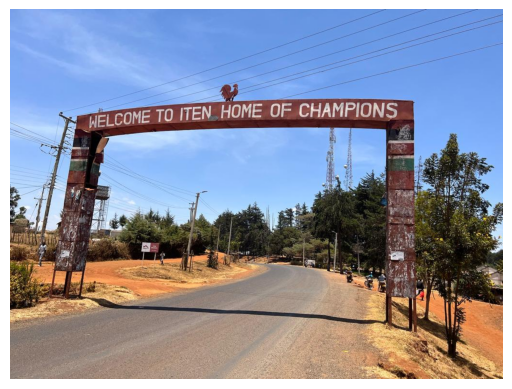

In [24]:
#| fig-align: center

img2 = cv2.imread('image.jpg')

plt.imshow(img2[:,:,::-1])
plt.axis('off')

The picture can be seen as a set of points in $\mathbb{R}^2$, corresponding to the pixels, where each point is assigned a color. 
We are now going to move the points according to a linear transformation $\mathbb{R}^2 \to \mathbb{R}^2$ which maps $\mathbf{x}$ to $A\textbf{x}$.

We first predefine a Python function called `perform_Transformation()` to apply a transformation to the image. You don't have to understand this code, but only remember that its purpose is  to apply transformations to images. The function takes as input an image and a transformation matrix.

In [25]:
# Function to apply transformation and visualize the result (source: kaggle.com)
def perform_Transformation(image, A):
    rows,cols,ch = image.shape

    M = np.array([[A[0,0], A[0,1], 0],
                [A[1,0], A[1,1], 0]])

    dst = cv2.warpAffine(image,M,(cols,rows))
    
    
    plt.figure(figsize = (24,8))
    plt.subplot(211); plt.imshow(image[:,:,::-1]); plt.title('Original Image')
    
    plt.subplot(212); plt.imshow(dst[:,:,::-1]); plt.title("Transformed Image")

Next, we create a 2x2 (transformation) matrix $A$ and use the image that we stored in `img2` variable and apply the transformation function to these inputs. The function prints both the original and transformed image.

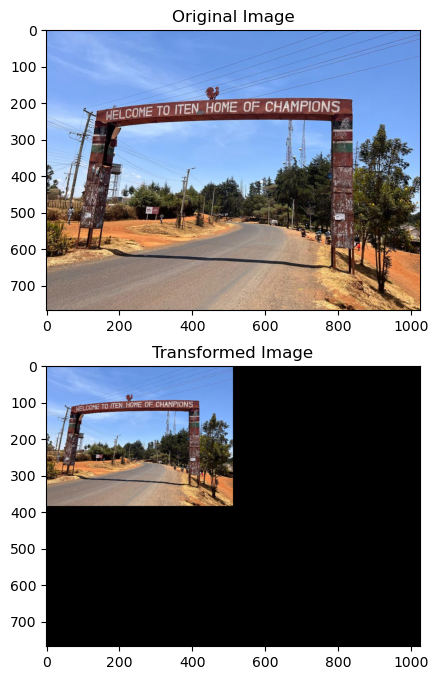

In [26]:
# The matrix A scales the picture down 50% in both the x direction and y direction
A = np.array([[0.5,0],
                [0,0.5]])

perform_Transformation(img2, A)

**Exercise 5.5:** 

i. Can you scale the picture 50% down in the $x$-direction only? 

ii. Investigate what the matrix $A=\begin{bmatrix} 0  &1 \\ 1 & 0  \end{bmatrix}$ does to the picture. Can you explain why?

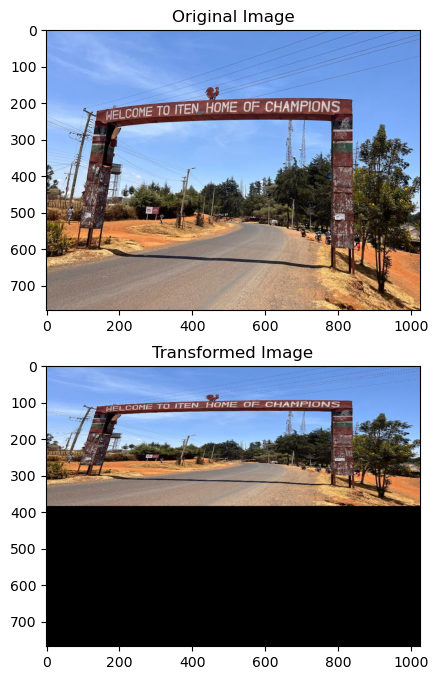

In [29]:
# your code here

A=np.array([[1.0, 0.0],[0.0 ,0.5]])
perform_Transformation(img2,A)


The following matrix rotates the picture approximately 45 degrees (note that $\sin(\pi/4) = \cos(\pi/4) \approx 0.707$). 
Sadly, the image is only partly visible then.

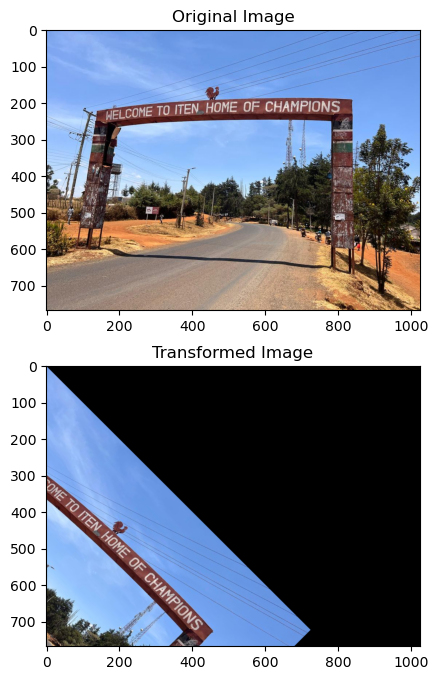

In [30]:
# The matrix A rotates the picture 45 degrees
A = np.array([[0.707,-0.707],
                [0.707,0.707]])

perform_Transformation(img2, A)

**Exercise 5.6:** 

i. Let $A=\begin{bmatrix} 0.5  &0 \\ 0 & 1  \end{bmatrix}$ and $B= \begin{bmatrix} 0  &1 \\ 1 & 0  \end{bmatrix}$. Compute the matrix products $AB$ and $BA$.

ii. Investigate what the matrix $BA= \begin{bmatrix} 0  &1 \\ 1 & 0  \end{bmatrix}\begin{bmatrix} 0.5  &0 \\ 0 & 1  \end{bmatrix}$ does to the picture. Can you explain why?

iii. What does the matrix $AB = \begin{bmatrix} 0.5  &0 \\ 0 & 1  \end{bmatrix} \begin{bmatrix} 0  &1 \\ 1 & 0  \end{bmatrix}$  to the picture and why? 

iv. Can you scale the picture 50% down in the $x$-direction only, and then rotate the picture (approximately) 45 degrees? What matrix corresponds to this?

[[0.  0.5]
 [1.  0. ]]
[[0.  1. ]
 [0.5 0. ]]


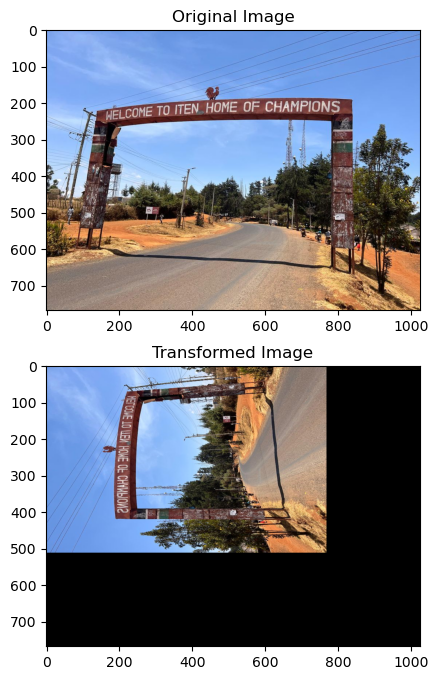

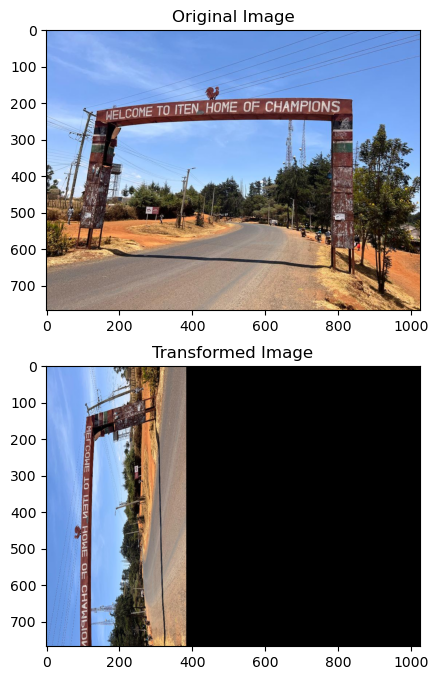

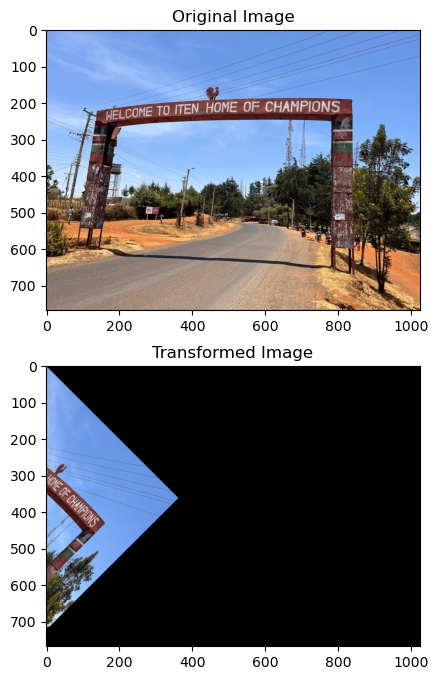

In [36]:
# your code here

A=np.array([[0.5,0.0],[0,1.0]])
B=np.array([[0.0,1.0],[1.0,0.0]])

print(A@B)
print(B@A)

perform_Transformation(img2,B@A)

perform_Transformation(img2,A@B)


A=np.array([[0.5,0.0],[0,1.0]])
M = np.array([[0.707,-0.707],
                [0.707,0.707]])
perform_Transformation(img2, M@A)



## Symbolic computations: sympy


The `sympy` library is for symbolic computations. We will now demonstrate how this library works. `sympy` also contains a function to bring a matrix into reduced echelon form. This is very useful if you want to verify manual calculations. 

In [ ]:
import sympy as sp

We now show how to solve the following system of equations:

$$
\left\{\begin{array}{l}
x_1 - 3x_2 + 4x_3 = -4 \\
3x_1 -7x_2 +7x_3 = -8 \\
-4x_1 + 6x_2 + 2x_3 = 4 
\end{array}\right.
$$
 The augmented matrix of the system of linear equations is

$$
\left[\begin{array}{ccc|c}
1 & -3 & 4 & -4 \\
3 & -7 & 7 & -8 \\
-4 & 6 & 2 & 4 \\
\end{array}\right]
$$

In Python you can do this with `sympy` as follows.

In [ ]:
Ab=sp.Matrix([[1,-3,4,-4],[3,-7,7,-8],[-4,6,2,4]])

Now we can find the reduced form of the system using `rref()` from the `sympy` library. The method returns two elements. The first is the row-reduced echelon form of the matrix, and the second is a list of the pivot columns. By typing `Ab_rref[0]`, only the row-reduced echelon form is printed.

In [ ]:
Ab_rref = Ab.rref()
Ab_rref[0]

The system is consistent and we can immediately see the general solution: $x_1=2$, $x_2=2$ and $x_3=0$. The solution is exact, e.g., Python did not round the number 2 to 2.00000 as it does when using the `numpy` module. `sympy` allows us to do exact computation with matrices, as opposed to approximate computations with `numpy`. Computations with `sympy` are generally slower than with `numpy`, so for very large systems, `numpy` is preferred.

**Exercise 5.7:** Use Python to solve the following system of equations:

$$
\left\{\begin{array}{l}
x_1 - 3x_2  = 5 \\
-x_1 +x_2 +5x_3 = 2 \\
x_2 + x_3 = 0 
\end{array}\right.
$$

In [ ]:
# your code here

## Application: supply and demand model
(From Linear Algebra notebook by Herbert Hamers)

The demand $q_d$ and supply $q_s$ of an item depend on the price $p$ and income $Y$. Suppose that the relation between demand, price and income can be described by the equation

$$q_d = 8 - 0.2p + 0.1Y,$$

and the relation between supply and price by the equation

$$q_s = 6 + 0.3p.$$

The market is in equilibrium if $q_s = q_d$. Replacing both $q_s$ and $q_d$ by the new variable $q$, the market equilibrium can be found by solving the following system of two linear equations for the unknowns $p$, $q$ and $Y$:

$$
\left\{\begin{array}{l}
q = 8 - 0.2p + 0.1Y\\
q = 6 + 0.3p.
\end{array}\right.
$$

First, we will rewrite this system of linear equations. We place all terms with a variable to the left of the equal sign and moreover we put terms with the same variable in the different equations right below each other:

$$
\left\{\begin{array}{l}
q + 0.2p - 0.1Y = 8\\
q - 0.3p = 6.
\end{array}\right.
$$

In [ ]:
Ab = sp.Matrix([[1, 0.2, -0.1, 8], [1, -0.3, 0, 6]]) 
Ab

**Exercise 5.8:** 

How many solutions does this system of linear equations have? You can use the function `rref()` again to find the row reduced echelon form of the above matrix. 
Determine the solution if $Y=50$.

In [ ]:
# your code here

## Symbolic computation of the determinant in Python with `sympy`

The `sympy` package can also be used to calculate determinants of symbolic matrices.

**Exercise 5.9:**
 
We now investigate how to compute determinants of _symbolic_ matrices using sympy. Let 
$$
A = \begin{pmatrix}  1 & 0 & x \\ 1 & -x & 0 \\ x & 0 & -x \end{pmatrix}.
$$
Compute $\det(A)$ using the `sympy` module. First we define the variable x:

In [ ]:
import sympy as sp
x = sp.symbols('x')

Next, define the matrix A, and compute the determinant of A using the `sympy` function A.det(). For which values of $x$ does the determinant equal zero? To be able to see more easily for which values of $x$ the determinant equals $0$, you can use `sympy`'s factor function.

In [ ]:
# your code here

For which values of $x$ is $A$ invertible?

## (Optional) Row reduction with intermediate steps

This optional section describes a more advanced code snippet that implements a row-reduction algorithm from scratch, and allows you to output the intermediate operations. You should be able to read most of the code and recognize the algorithm, but some details have not been explained in this notebook. More specifically, you will see again for-loops and if-statements, but also "new" functions such as .copy(), .as\_mutable(), .append(). If you are interested, we invite you to look up their documentation. You can also use this algorithm to revisit some examples that you have seen in the linear algebra course. 

<!-- The above section explained how to use sympy's rref() function to obtain the row-reduced echelon form of a matrix. That method, however, only provided the "final answer": it does not return the row-operations that have been performed. Below, we provide a Python script that implements a basic row reduction algorithm, shows all intermediate steps, and the operations that it performs. The script uses some basic Python functionalities that you have seen in these two lectures (for-loops, if-statements), but also more advanced features of the sympy package. (We do not explain here the functionality of .copy(), for example, but we invite you to look up the documentation in case you are interested.) -->

As a disclaimer: this code has been generated using ChatGPT. 


In [ ]:
from sympy import Matrix

def rref_with_steps(mat):
    """
    Perform row-reduction to RREF while recording intermediate steps and row operations.
    Returns:
        rref_matrix (Matrix),
        pivot_columns (tuple),
        steps (list of (Matrix, str))  # Each step is (matrix_snapshot, operation_description)
    """
    A = mat.as_mutable().copy()
    rows, cols = A.shape
    pivots = []
    steps = [(A.copy(), "Initial matrix")]

    row = 0
    for col in range(cols):
        if row >= rows:
            break

        # Find pivot row
        pivot_row = None
        for r in range(row, rows):
            if A[r, col] != 0:
                pivot_row = r
                break

        if pivot_row is None:
            continue

        # Swap rows if needed
        if pivot_row != row:
            A.row_swap(pivot_row, row)
            steps.append((A.copy(), f"Swap R{pivot_row+1} ↔ R{row+1}"))

        # Scale pivot row
        pivot_val = A[row, col]
        if pivot_val != 1:
            A.row_op(row, lambda x, _: x / pivot_val)
            steps.append((A.copy(), f"R{row+1} → (1/{pivot_val})·R{row+1}"))

        # Eliminate other rows
        for r in range(rows):
            if r != row and A[r, col] != 0:
                factor = A[r, col]
                A.row_op(r, lambda x, j: x - factor * A[row, j])
                steps.append((A.copy(), f"R{r+1} → R{r+1} - ({factor})·R{row+1}"))

        pivots.append(col)
        row += 1

    return A, tuple(pivots), steps

In [ ]:
A = Matrix([[1, 2, 1],
            [2, 4, 3],
            [3, 6, 5]])

rref_matrix, pivots, steps = rref_with_steps(A)

print("RREF:")
print(rref_matrix)
print("Pivot columns:", pivots)

print("\nSteps:")
for i, (s, op) in enumerate(steps):
    print(f"Step {i}: {op}")
    display(s)